In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import sleep
from time import time
import csv

# to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

def api_pull():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'10',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'f3f0734d-8d9c-4a2e-be9e-82e0501f442e',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:  
        print(e) 


    final_df = pd.json_normalize(data['data'])
    final_df['timestamp'] = pd.to_datetime('now', utc=True)
    # 'utc=True' to avoid deprecation error
    return final_df

# checks for file existence and creates if not exist, and closes with 'pass'
if not os.path.isfile(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv'):
    with open(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', 'w') as opt:
        pass
    
# automates call, creates an empty list, each 'call' result is appended to the result
data_frames = []
for pulls in range(5):
    data_frames.append(api_pull())
    print("API pull completed successfully!")
    sleep(60) # delay
final_d = pd.concat(data_frames)

In [ ]:

# compile all returned API calls and writes with 'mode=w' to csv file if file exists, else if it's a newly created file, 'mode=a' to append data every call
# final_d.to_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', mode='w', header=True, index=False)
final_d.to_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', mode='a', header=False, index=False)

In [ ]:
print(final_d)
# reads file
check_frame = pd.read_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv')
#print(check_frame)
#pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [19]:
# '.groupby.(metric of interest, e.g mean)' similar to groupings in SQL
final_d1 = final_d.groupby('name', sort=True)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
final_d1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,-0.434531,-0.272986,-2.376980,5.518045,1.870891,28.854839
Bitcoin,-0.202889,1.152824,3.241753,21.373354,24.795371,72.488874
Cardano,0.238765,5.489474,10.405710,11.923267,6.959198,62.197757
Dogecoin,1.199329,4.436724,3.394426,-3.629403,-15.725396,11.937997
Ethereum,-0.099028,1.140513,3.860308,10.750391,16.441328,53.006073
Polygon,-0.193357,1.641698,0.564031,-8.757488,2.349953,48.604762
Solana,-0.237406,2.421405,1.356895,-4.426247,-12.506684,111.420121
Tether,-0.007174,0.007912,-0.093332,-0.002216,0.008255,0.046390
USD Coin,-0.000893,0.000642,0.018626,-0.014749,-0.015417,-0.021295


In [ ]:
# converts to series
final_d2 = final_d1.stack()
final_d2

In [16]:
# flips back dataframe (column title gets converted into rows)
final_d3 = final_d2.to_frame()
final_d3.count()

0    60
dtype: int64

In [18]:
# 
index = pd.Index(range(60))
final_d4 = final_d3.reset_index()
final_d4

,name,level_1,0
0,BNB,quote.USD.percent_change_1h,-0.434531
1,BNB,quote.USD.percent_change_24h,-0.272986
2,BNB,quote.USD.percent_change_7d,-2.376980
3,BNB,quote.USD.percent_change_30d,5.518045
4,BNB,quote.USD.percent_change_60d,1.870891
5,BNB,quote.USD.percent_change_90d,28.854839
6,Bitcoin,quote.USD.percent_change_1h,-0.202889
7,Bitcoin,quote.USD.percent_change_24h,1.152824
8,Bitcoin,quote.USD.percent_change_7d,3.241753
9,Bitcoin,quote.USD.percent_change_30d,21.373354


In [28]:
# rename column 2
final_d5 = final_d4.rename(columns={'level_1':'percent_change', 0:'values'})
final_d5

,name,percent_change,values
0,BNB,quote.USD.percent_change_1h,-0.434531
1,BNB,quote.USD.percent_change_24h,-0.272986
2,BNB,quote.USD.percent_change_7d,-2.376980
3,BNB,quote.USD.percent_change_30d,5.518045
4,BNB,quote.USD.percent_change_60d,1.870891
5,BNB,quote.USD.percent_change_90d,28.854839
6,Bitcoin,quote.USD.percent_change_1h,-0.202889
7,Bitcoin,quote.USD.percent_change_24h,1.152824
8,Bitcoin,quote.USD.percent_change_7d,3.241753
9,Bitcoin,quote.USD.percent_change_30d,21.373354


In [34]:
final_d5['percent_change'] = final_d5['percent_change'].replace(['1h', '24hours', '7d', 
                                    '30days', '60days', '90ays'],
                                   ['1h','24h','7d','30d','60d','90d'])
final_d5

,name,percent_change,values
0,BNB,quote.USD.percent_change_1h,-0.434531
1,BNB,quote.USD.percent_change_24h,-0.272986
2,BNB,quote.USD.percent_change_7d,-2.376980
3,BNB,quote.USD.percent_change_30d,5.518045
4,BNB,quote.USD.percent_change_60d,1.870891
5,BNB,quote.USD.percent_change_90d,28.854839
6,Bitcoin,quote.USD.percent_change_1h,-0.202889
7,Bitcoin,quote.USD.percent_change_24h,1.152824
8,Bitcoin,quote.USD.percent_change_7d,3.241753
9,Bitcoin,quote.USD.percent_change_30d,21.373354


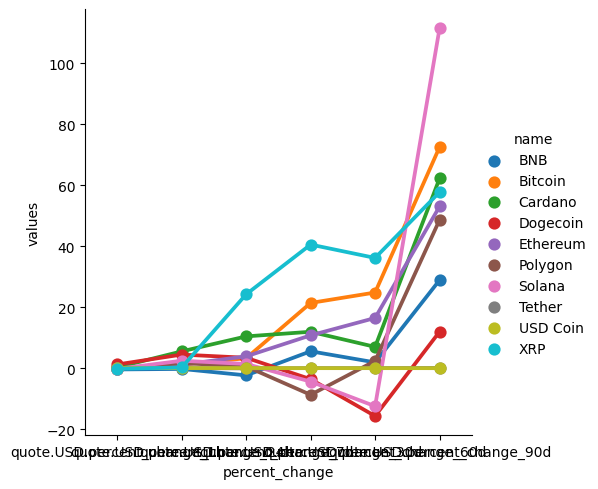

In [35]:
import seaborn as sns
import matplotlib as plt

sns.catplot(x = 'percent_change', y = 'values', hue='name',data=final_d5, kind='point')